# Partie 1 : Jeu de données Movies
Dans cette on va étudier le jeu de données Movies. Le but est de combiner les différents outils de statistique
descriptive et de statistique inférentielle

La loi de Benford est une loi semi-empirique qui affirme que dans les nombres que l’on rencontre dans la vie courante, le premier chiffre significatif n’est pas équiréparti dans l’ensemble {1, . . . , 9}, mais qu’il est distribué selon la loi suivante :

 $$p_i = P(\text{premier chiffre significatif égal à } i) = \log_{10} \left( \frac{i + 1}{i} \right)$$

où $\log_{10}$ est le logarithme décimal, défini par :

$\log_{10}(x) = \frac{\log(x)}{\log(10)}$

Au début des années 1990, un économiste américain a remarqué que lorsque les gens falsifiaient les comptes d’une société, ils avaient tendance à utiliser trop de 5 et de 6 comme premiers chiffres significatifs, c’est-à-dire plus que n’en prévoit la loi de Benford, qui par ailleurs est bien vérifiée pour ce genre de données numériques.


In [18]:
Loi_benford <- log10((1 + c(1:9)) /c(1:9))
sum(Loi_benford)

[1] 1

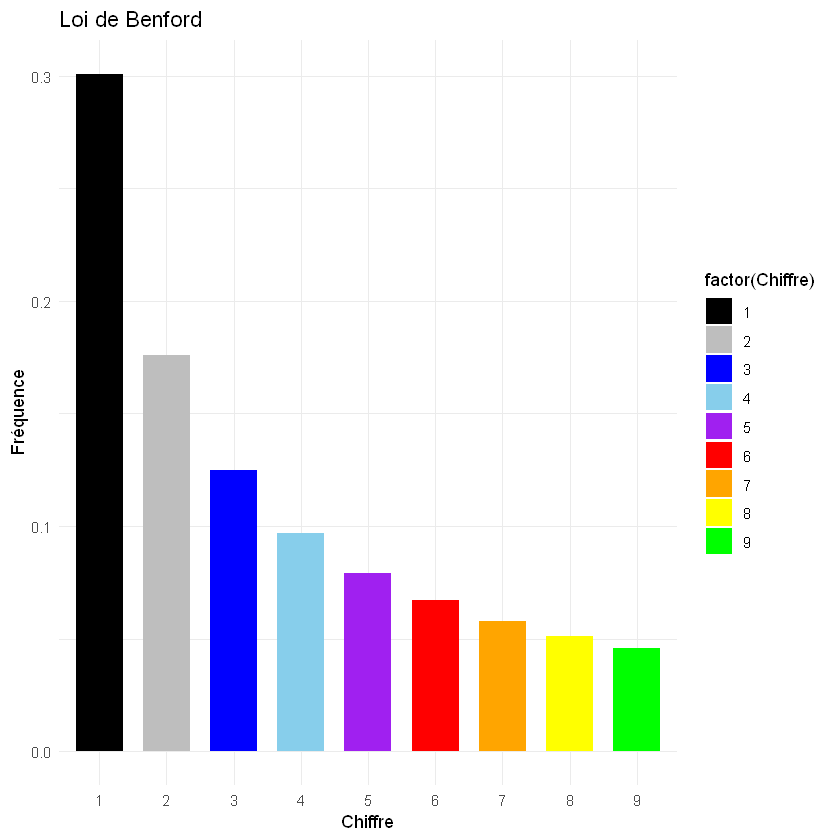

In [19]:
benford_df <- data.frame(Chiffre = 1:9, Frequence = Loi_benford)

# Tracer le diagramme en bâtons
library(ggplot2)
couleurs <- c("black", "gray", "blue", "skyblue", "purple", "red", "orange", "yellow", "green")
ggplot(benford_df, aes(x = factor(Chiffre), y = Frequence,fill = factor(Chiffre))) +
  geom_bar(stat = "identity", width = 0.7) +
  labs(title = "Loi de Benford",
       x = "Chiffre",
       y = "Fréquence") +
  scale_fill_manual(values = couleurs) +
  theme_minimal()

In [20]:
movies_data <- read.csv("Movies.csv",header=TRUE,sep=";",dec=",")
movies_data <- na.omit(movies_data)
movies_data <- movies_data[movies_data$budget > 0,]
head(movies_data)


,X,year,length,budget,rating,Action,Animation,Comedy,Drama,Documentary,Romance
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
22,22,1935,85,450000,7.2,0,0,0,1,0,0
35,35,1966,74,19000,1.6,0,0,0,0,0,0
48,48,1997,113,23000000,4.8,0,0,1,0,0,1
91,91,2002,96,5000000,3.7,0,0,0,0,0,0
112,112,1999,97,16000000,6.7,0,0,1,0,0,1
124,124,2002,98,1100000,5.6,0,0,1,0,0,0


In [21]:
first_digit=function(n){
fd=0
compt=0
while(is.na(fd)||fd==0)
{
compt=compt+1
fd=as.integer(substr(as.character(n),compt,compt))
}
return(fd)
}

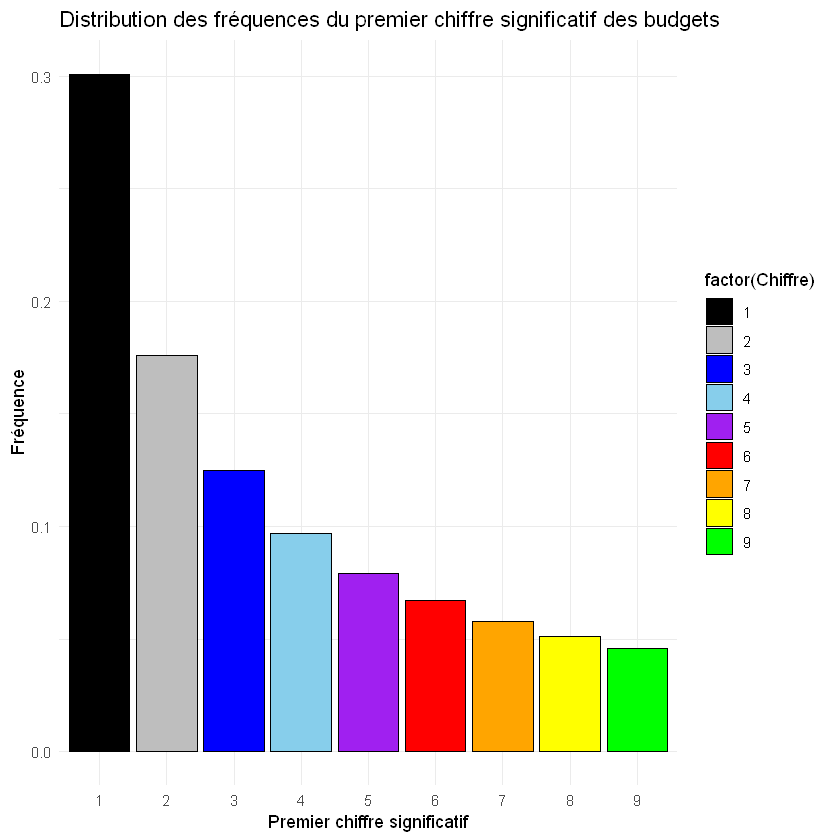

In [22]:
table_contingence <- table(Loi_benford)
budget_first_digit <- sapply(movies_data$budget, first_digit)

benford_donnes <- data.frame(Chiffre = 1:9,Fréquence = Loi_benford)

ggplot(data = benford_donnes, aes(x = factor(Chiffre), y = Fréquence, fill = factor(Chiffre))) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Distribution des fréquences du premier chiffre significatif des budgets",
       x = "Premier chiffre significatif",
       y = "Fréquence") +
  theme_minimal() + scale_fill_manual(values = c("black", "gray", "blue", "skyblue", "purple", "red", "orange", "yellow", "green"))

### Observations :

Le premier chiffre significatif 1 est le plus fréquent, suivi par 2 et 3.

Les chiffres significatifs 8 et 9 sont les moins fréquents.

La distribution est légèrement asymétrique à droite.

### Comparaison à la loi de Benford :

La loi de Benford prédit une distribution logarithmique des premiers chiffres significatifs.

### Différences observées :

Le premier chiffre significatif 1 est plus fréquent que prévu par la loi de Benford.
Cela pourrait s'expliquer par le fait que les budgets des films sont souvent arrondis à des nombres entiers, ce qui favorise le chiffre 1.

Les chiffres significatifs 8 et 9 sont moins fréquents que prévu par la loi de Benford.
Cela pourrait s'expliquer par le fait que les budgets des films sont souvent exprimés en millions ou milliards de dollars, ce qui rend les chiffres 8 et 9 moins probables.

### Conclusion :

La distribution du premier chiffre significatif du budget des films ne correspond pas parfaitement à la loi de Benford.

## Test statistique :

**H0 (Hypothèse nulle) :**
La distribution du premier chiffre significatif des budgets des films suit la loi de Benford.

**H1 (Hypothèse alternative) :**
La distribution du premier chiffre significatif des budgets des films ne suit pas la loi de Benford.

**Le test à réaliser :** 
un test de Chi deux χ² car on compare deux distributions, observée et attendue 

In [23]:
chisq.test(table(budget_first_digit), p=Loi_benford)


	Chi-squared test for given probabilities

data:  table(budget_first_digit)
X-squared = 45.913, df = 8, p-value = 2.469e-07


### Conclusion : 
**p-value = 2.469e-07 :** On rejette l'hypothèse **H0** et on conclut l'hypothèse **H1**

## On s’intéresse à la durée des films (variable length) et à la note attribuée par les spectateurs (rating). On cherche à savoir si la longueur des films a une influence sur la note obtenue.

In [24]:
# création de la variable duree :
movies_data$duree  <- ifelse(movies_data$length <= 120, "Court", "Long")
str(movies_data)

'data.frame':	5183 obs. of  12 variables:
 $ X          : int  22 35 48 91 112 124 126 139 143 145 ...
 $ year       : int  1935 1966 1997 2002 1999 2002 1997 1989 2001 2000 ...
 $ length     : int  85 74 113 96 97 98 94 117 103 100 ...
 $ budget     : int  450000 19000 23000000 5000000 16000000 1100000 140000 200000 200000 85000000 ...
 $ rating     : num  7.2 1.6 4.8 3.7 6.7 5.6 3.3 7.8 5.8 4.7 ...
 $ Action     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Animation  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Comedy     : int  0 0 1 0 1 1 0 0 0 1 ...
 $ Drama      : int  1 0 0 0 0 0 1 0 1 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 1 0 0 ...
 $ Romance    : int  0 0 1 0 1 0 0 0 0 0 ...
 $ duree      : chr  "Court" "Court" "Court" "Court" ...
 - attr(*, "na.action")= 'omit' Named int [1:53573] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:53573] "1" "2" "3" "4" ...


In [25]:
ordred_movies_data <- ordered(movies_data, levels = c("Court", "Long"))
table_data <- table(ordred_movies_data)
print(table_data)

ordred_movies_data
Court  Long 
    0     0 


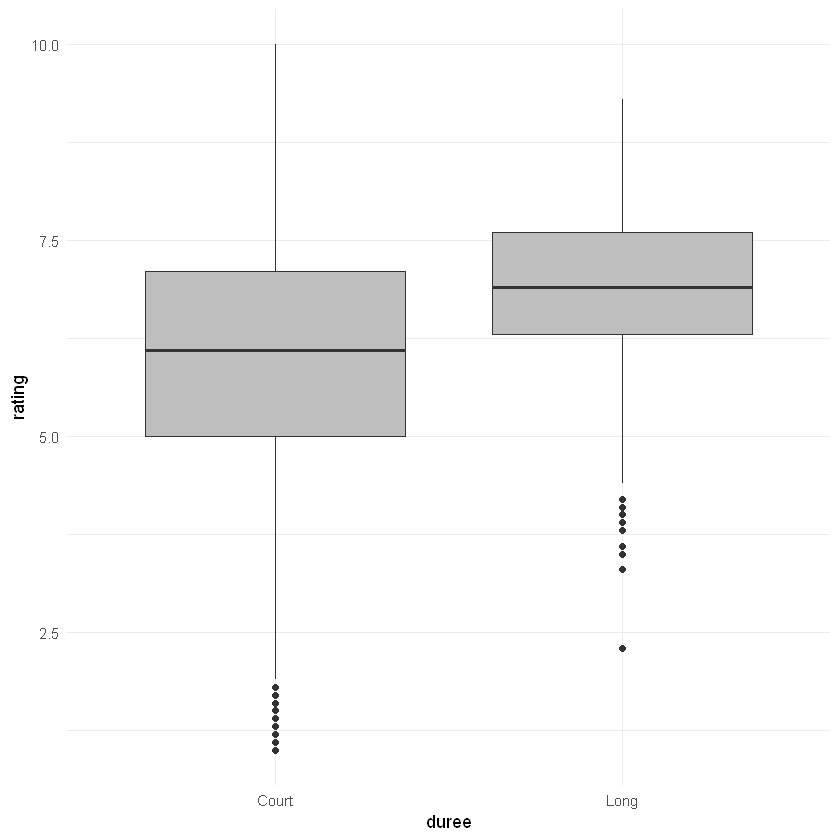

In [26]:
ggplot(data = movies_data) + 
  aes(x = duree, y = rating) + 
  geom_boxplot(fill = "gray") +
  theme_minimal()

### Le boxplot montre la distribution des notes des films pour deux catégories de durée :

**Films courts :**

La boîte est plus large, indiquant une distribution des notes plus concentrée.

La médiane (ligne horizontale dans la boîte) est inférieure à celle des films longs, indiquant une note moyenne légèrement inférieure pour les films courts. La médiane est d'environ 5,5. La plupart des notes se situent entre 2,5 et 5.

Il y a quelques valeurs aberrantes (points en dehors des moustaches) qui indiquent des notes très basses ou très élevées.

**Films longs :**

La boîte est plus étroite, indiquant une distribution des notes plus étalée.

La ligne centrale (médiane) du graphique est légèrement supérieure à celle des films courts. elle se situe autour de 7,25

On observe également quelques points de données en dehors des moustaches indiquant des films avec des notes très basses.

# Test statistique :
Le test t de student est un test statistique utilisé pour comparer les moyennes de deux groupes indépendants Long et Court.

- **Hypothèse nulle (H0)** : Il n'y a pas de différence significative entre les moyennes des deux groupes.
  
   $H_0: \mu_1 = \mu_2$

  où $\mu_1$ est la moyenne du premier groupe et $\mu_2$ est la moyenne du deuxième groupe.

- **Hypothèse alternative (H1)** : Il existe une différence significative entre les moyennes des deux groupes. Cela peut être exprimé comme suit :
  
  $H_1: \mu_1 \neq \mu_2$

In [27]:
films_court <- movies_data$rating[movies_data$duree == "Court"]
films_longs <- movies_data$rating[movies_data$duree == "Long"]

# Les données sont de meme variance ou pas
var(films_court)
var(films_longs)

t.test(films_court,films_longs)

[1] 2.516736

[1] 1.06827


	Welch Two Sample t-test

data:  films_court and films_longs
t = -19.486, df = 1631.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.9312677 -0.7609306
sample estimates:
mean of x mean of y 
 6.003778  6.849877 


### Conclusion :
**Valeur de t (test statistic): -19.486 :** Une valeur négative indique que la note moyenne des films longs est supérieure à la note moyenne des films courts

**Degrés de liberté (df): 1631.5 :** Cette valeur est estimée par le test pour tenir compte des variances inégales entre les deux groupes. 

**(p-value < 2.2e-16) :** 
La p-value est bien en dessous du seuil de significativité classique de 5%, et les moyennes confirment également cette constatation. 

Les résultats du test t de Welch confirment qu'il existe une différence statistiquement significative entre les notes moyennes des films courts et longs. Les films longs ont une note moyenne statistiquement plus élevée que les films courts.

On rejette l'hypothèse **H0** et on conclut l'hypothèse **H1**

## On cherche maintenant à étudier le lien entre le genre du film et la note attribuée.

In [28]:
data_frame <- read.csv("Movies_genre.csv",header=TRUE,sep=";",dec=",")
head(data_frame)
summary(data_frame)

,X,year,length,budget,rating,Genre,Genre_bin
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>
1,1,1971,121,NA,6.4,Comedy,1
2,2,1971,121,NA,6.4,Drama,1
3,3,1939,71,NA,6.0,Comedy,1
4,4,1941,7,NA,8.2,Animation,1
5,5,1996,70,NA,8.2,Comedy,1
6,6,2000,91,NA,4.3,Drama,1


       X              year          length           budget        
 Min.   :    1   Min.   :1894   Min.   :  1.00   Min.   :0.00e+00  
 1st Qu.:13920   1st Qu.:1956   1st Qu.: 76.00   1st Qu.:6.50e+05  
 Median :27839   Median :1983   Median : 91.00   Median :5.00e+06  
 Mean   :27839   Mean   :1976   Mean   : 83.45   Mean   :1.66e+07  
 3rd Qu.:41757   3rd Qu.:1998   3rd Qu.:103.00   3rd Qu.:2.00e+07  
 Max.   :55676   Max.   :2005   Max.   :873.00   Max.   :2.00e+08  
                                                 NA's   :49699     
     rating         Genre             Genre_bin
 Min.   : 1.00   Length:55676       Min.   :1  
 1st Qu.: 5.20   Class :character   1st Qu.:1  
 Median : 6.20   Mode  :character   Median :1  
 Mean   : 6.08                      Mean   :1  
 3rd Qu.: 7.10                      3rd Qu.:1  
 Max.   :10.00                      Max.   :1  
                                               

In [29]:
data_frame$Satisfaction <- ifelse(data_frame$rating < 5, "Mauvais",
                              ifelse(data_frame$rating < 7.5, "Moyen", "Bon"))
head(data_frame)

,X,year,length,budget,rating,Genre,Genre_bin,Satisfaction
,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<chr>
1,1,1971,121,NA,6.4,Comedy,1,Moyen
2,2,1971,121,NA,6.4,Drama,1,Moyen
3,3,1939,71,NA,6.0,Comedy,1,Moyen
4,4,1941,7,NA,8.2,Animation,1,Bon
5,5,1996,70,NA,8.2,Comedy,1,Bon
6,6,2000,91,NA,4.3,Drama,1,Mauvais


In [30]:
data_frame$Satisfaction <- ordered(data_frame$Satisfaction, levels =c('Mauvais','Moyen','Bon'))
data_frame$rating <- ordered(data_frame$rating, levels =c('<5','[5,7.5]','>7.5'))
table_contingence <- table (data_frame$Satisfaction, data_frame$rating)
levels(data_frame$Satisfaction)
levels(data_frame$rating)

[1] "Mauvais" "Moyen"   "Bon"

[1] "<5"      "[5,7.5]" ">7.5"

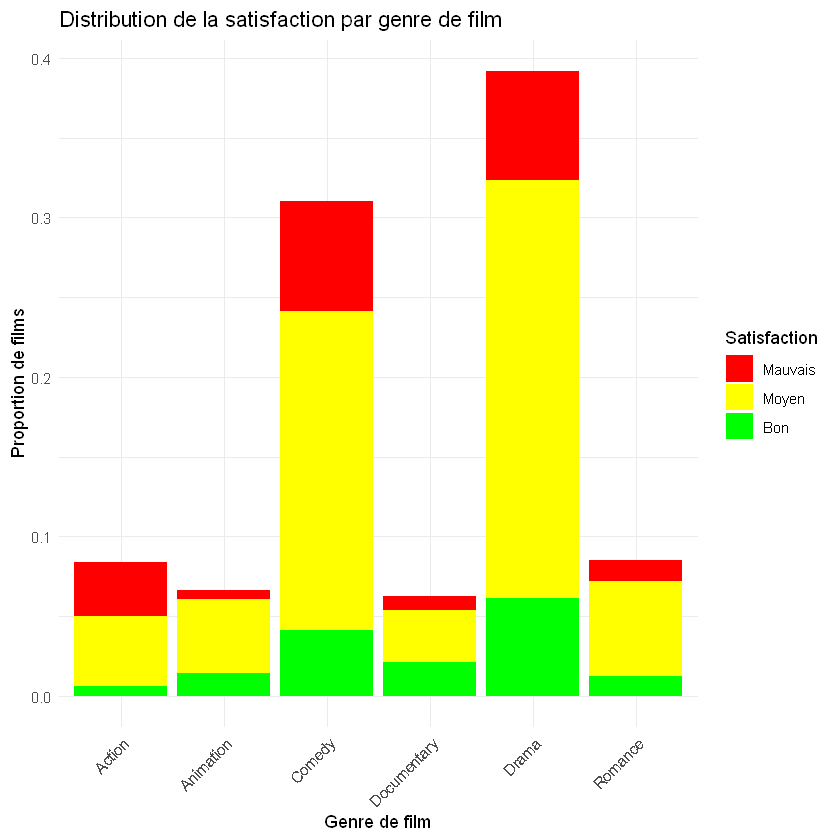

In [31]:
ggplot(data = data_frame, aes(x = Genre, fill = Satisfaction)) + 
  geom_bar(aes(y = (..count..)/sum(..count..))) +
  scale_fill_manual(values = c("Mauvais" = "red", "Moyen" = "yellow", "Bon" = "green")) +  # Spécifier les couleurs
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Distribution de la satisfaction par genre de film",
       x = "Genre de film",
       y = "Proportion de films",
       fill = "Satisfaction")

### Observations :

Il y a une grande variation dans la satisfaction des spectateurs pour tous les genres de films.

La satisfaction des spectateurs ne semble pas être fortement liée au genre du film.

Les films d'action et d'animation ont tendance à recevoir des niveaux de satisfaction moyens et faibles plus élevés que les niveaux de satisfaction élevés. Les films comiques et les drames affichent généralement des niveaux de satisfaction moyens plus élevés, avec des niveaux presque équivalents de satisfaction faible et élevée.

Les documentaires suscitent des niveaux de satisfaction uniformes, avec peu de satisfaction faible. En revanche, les films romantiques obtiennent généralement des niveaux de satisfaction moyens plus élevés, avec un équilibre entre les niveaux de satisfaction élevés et faibles.

# Test statistique :
On fait un test d'indépendence entre deux variables qualitatives "Genre" et "Satisfaction"

- **Hypothèse nulle (H0) :** Il n'y a pas de lien significatif entre le genre du film et la satisfaction des spectateurs.

$H_0$ = "Les variables "Genre" et "Satisfaction" sont indépendantes."

- **Hypothèse alternative (H1) :** Il y a un lien significatif entre le genre du film et la satisfaction des spectateurs.

$H_1$ = "Les variables "Genre" et "Satisfaction" ne sont pas indépendantes."

In [32]:
chisq.test(data_frame$Genre,data_frame$Satisfaction)


	Pearson's Chi-squared test

data:  data_frame$Genre and data_frame$Satisfaction
X-squared = 2781.4, df = 10, p-value < 2.2e-16


### Conclusion :
La valeur du chi-deux $X²$ est de 2781.4, ce qui est une valeur très élevée.
**La p-value** est inférieure à 2,2e-16, ce qui est une valeur très faible et en dessous du seuil de significativité classique de 5%

Le test de $X²$ montre que le genre du film est un facteur important qui influence la satisfaction du public.
- On rejette l'hypothèse $H_0$ et on conclut $H_1$

# Partie 2 : Etude de l’influence du genre sur le BMI

Chargement du jeu de données à partir de l’URL : "https://www.biostatistics.dk/teaching/bioinformatics/data/gwaspt.rda"

In [34]:
load(url("https://www.biostatistics.dk/teaching/bioinformatics/data/gwaspt.rda"))
head(phenotypes)
library(ggplot2)

,BMI,gender,age
,<dbl>,<fct>,<dbl>
1,23.39,Female,33.02133
2,22.72,Female,28.32208
3,23.52,Male,25.73901
4,25.03,Male,30.80271
5,21.64,Female,34.95409
6,22.16,Male,28.13544


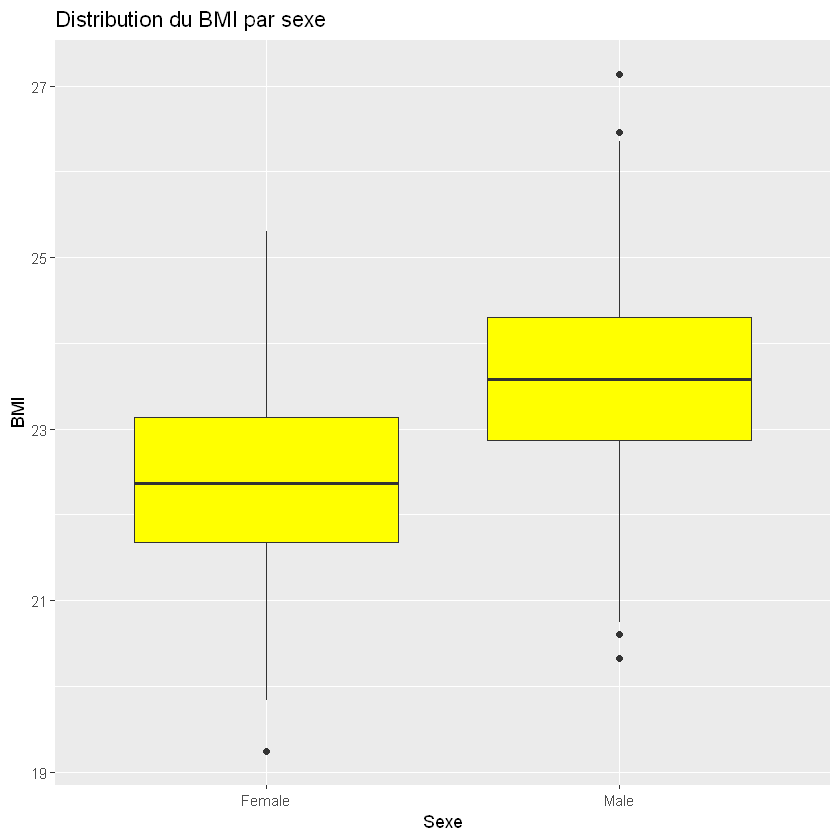

In [35]:
# Visualisation des données
ggplot(data = phenotypes, aes(x = gender, y = BMI)) +
  geom_boxplot(fill = "yellow") +
  labs(x = "Sexe", y = "BMI") +
  ggtitle("Distribution du BMI par sexe")

**Ligne centrale(médiane) :**  Elle est plus élevée chez les hommes que chez les femmes. Cela signifie que la moitié des hommes ont un BMI inférieur à la médiane et l'autre moitié a un BMI supérieur à la médiane. On observe la même chose pour les femmes.

**Boîte (quartile interquartile (IQR)) :** Il correspond à l'intervalle contenant les 50% intermédiaires des données. L'IQR est plus grand chez les hommes que chez les femmes, ce qui signifie que les données sont plus dispersées chez les hommes.

**Moustaches :** ils ont à peu près la même longueur pour les hommes et les femmes, ce qui signifie qu'il existe des valeurs aberrantes (des points de données qui se situent en dehors de l'IQR) dans les deux groupes.

# Test statistique :

Regardons si BMI suit une Gaussienne :

Warning message:
"`stat(density)` was deprecated in ggplot2 3.4.0.
i Please use `after_stat(density)` instead."



	Shapiro-Wilk normality test

data:  phenotypes$BMI
W = 0.99839, p-value = 0.2489


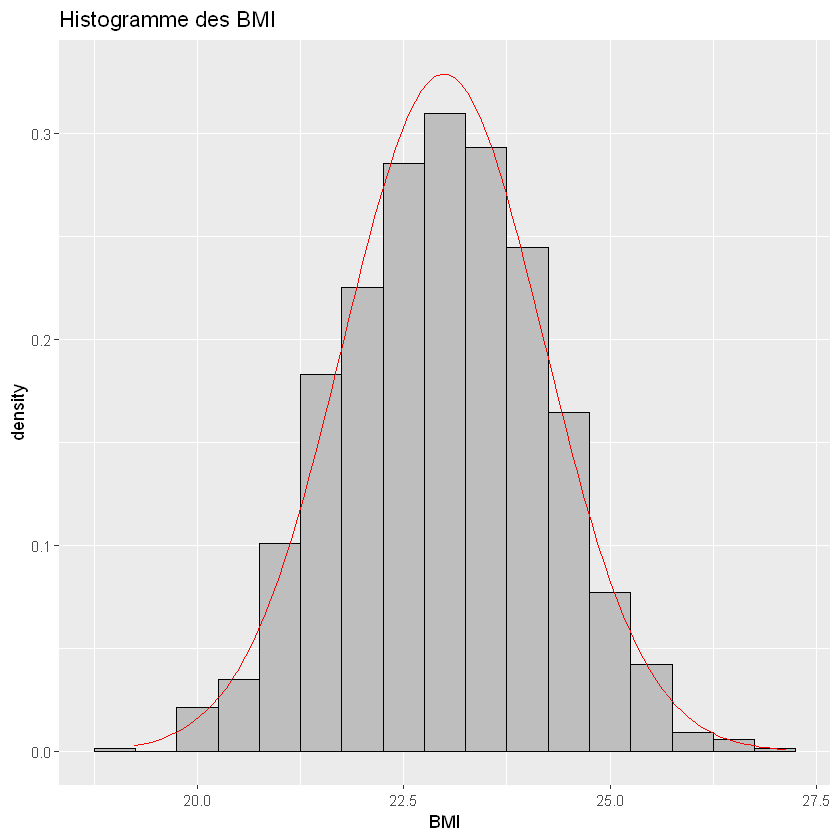

In [36]:
mu <- mean(phenotypes$BMI)
sd <- sd(phenotypes$BMI)


ggplot(data = phenotypes) + 
  geom_histogram(aes(x = BMI, y = stat(density)), binwidth = 0.5, fill = "gray", color = "black") + 
  ggtitle("Histogramme des BMI") + 
  stat_function(fun = dnorm, args = list(mean = mu, sd = sd), col = "red")

shapiro.test(phenotypes$BMI)

d'ou la variable suit bien une loi Gaussienne

In [37]:
BMI_Femmes <- phenotypes$BMI[phenotypes$gender == "Female"]
BMI_Hommes <- phenotypes$BMI[phenotypes$gender == "Male"]
length(BMI_Femmes)
length(BMI_Hommes)

# Calcul des variances on cas d'égalité
var(BMI_Femmes)
var(BMI_Hommes)

[1] 668

[1] 656

[1] 1.127162

[1] 1.159741

On fait un test de moyenne pour comparer la moyenne de BMI entre les hommes et les femmes

- **Hypothèse nulle (H0) :** Il n'y a pas de différence significative entre les moyennes de BMI des hommes et des femmes.

$ H_0: \mu_{\text{Hommes}} = \mu_{\text{Femmes}} $

- **Hypothèse alternative (H1) :** Il y a une différence significative entre les moyennes de BMI des hommes et des femmes.

$ H_1: \mu_{\text{Hommes}} \neq \mu_{\text{Femmes}} $

In [38]:
t.test(BMI_Hommes,BMI_Femmes,data = phenotypes)


	Welch Two Sample t-test

data:  BMI_Hommes and BMI_Femmes
t = 19.506, df = 1320.6, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.03125 1.26188
sample estimates:
mean of x mean of y 
 23.56462  22.41805 


### Conclusion :
**Les moyennes de BMI observées :** le BMI moyen des femmes est de 22.41805 tandis que celui des hommes est de 23.56462
**Le p-value < 2,2e-16 :** ce qui est largement inférieur au seuil de significativité de 0,05.
**La statistique t = -19,506 :** ce qui indique une différence importante entre les moyennes de BMI des hommes et des femmes.

Ainsi, nous pouvons conclure que, dans cet échantillon, il existe une différence significative de BMI entre les hommes et les femmes, les hommes ayant en moyenne un BMI plus élevé que les femmes. on rejette $H_0$ et on conclut $H_1$

## Etude du lien entre la génétique et le BMI

In [39]:
load(url("https://www.biostatistics.dk/teaching/bioinformatics/data/gwasgt.rda"))
dim(genotypes)
#1324 lignes
#32019 colones

[1]  1324 32019

In [40]:
variant_1 <- genotypes[,1]
phenotypes$BMI_cat <- ifelse(phenotypes$BMI < 25, "normal", "overweight")
contingency_table <- table(variant_1,phenotypes$BMI_cat)
contingency_table

         
variant_1 normal overweight
        0   1002         55
        1    244          6
        2     17          0

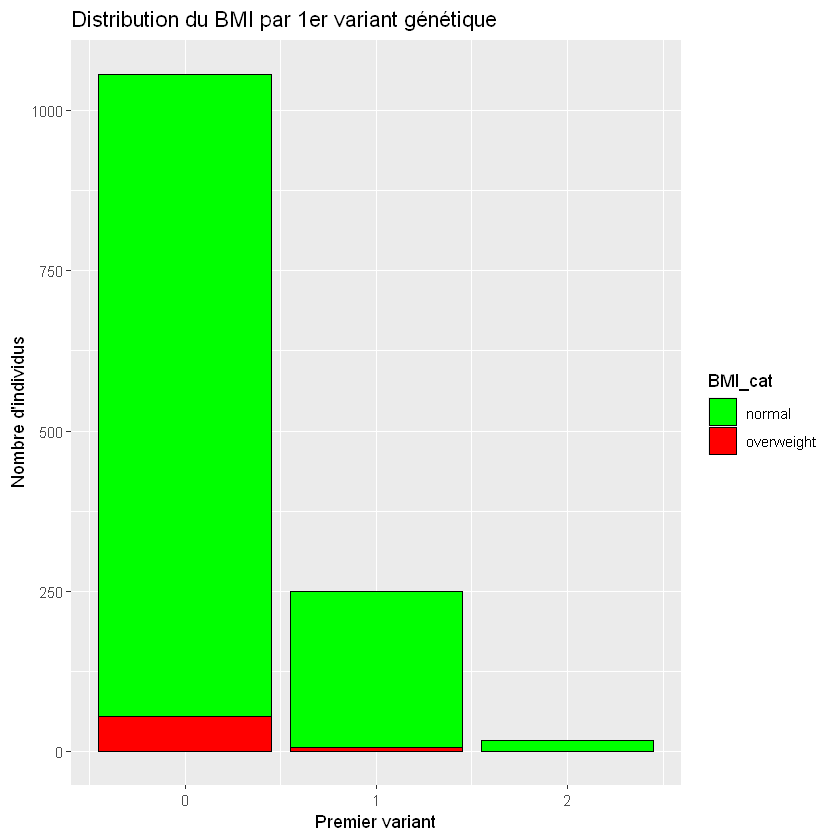

In [41]:
plot_1 <- ggplot(phenotypes) +
  geom_bar(aes(x = variant_1, fill = BMI_cat, y = (..count..)), color = "black") +
  scale_fill_manual(values = c("green", "red")) +
  labs(x = "Premier variant", y = "Nombre d'individus", title = "Distribution du BMI par 1er variant génétique")
print(plot_1)

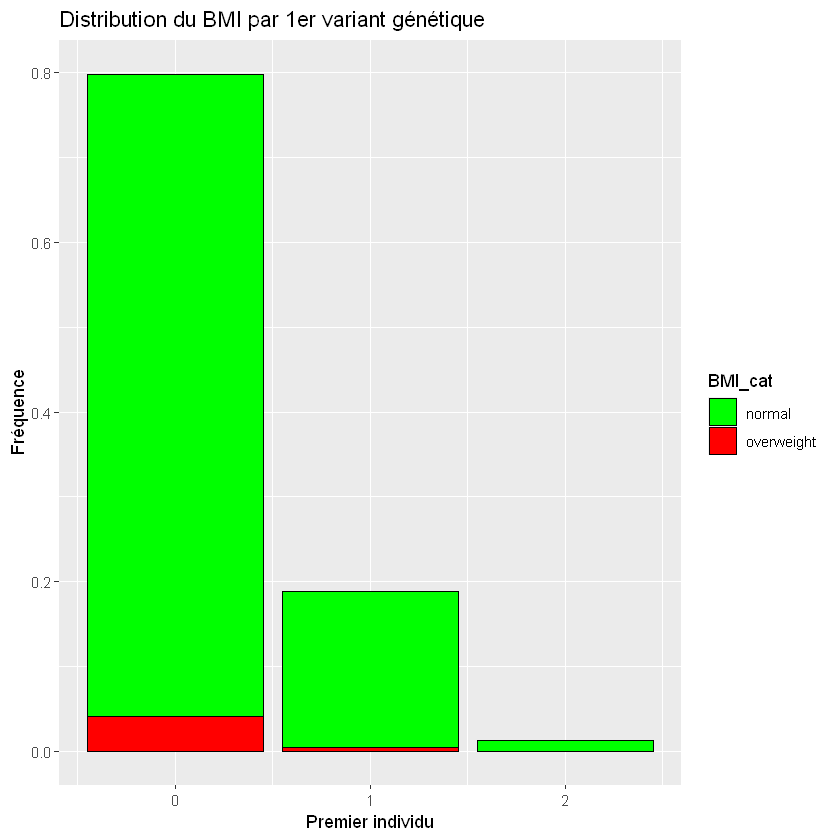

In [42]:
plot_2 <- ggplot(phenotypes) +
  geom_bar(aes(x = variant_1, fill = BMI_cat, y = (..count..)/sum(..count..)), color = "black") +
  scale_fill_manual(values = c("green", "red")) +
  labs(x = "Premier individu", y = "Fréquence", title = "Distribution du BMI par 1er variant génétique")
print(plot_2)

**Commentaire :** La distribution du premier variant est unimodale, ce qui signifie qu'il y a un seul pic dans la distribution. et c'est le cas pour "overweight" et "normal", à priori il n'y a pas de lien

# Test statistique :
**Modèle :**

- **Hypothèse nulle (H0)**  : Le premier variant génétique est indépendant du BMI.
​
- **Hypothèse alternative (H1)**  : Le premier variant génétique est associé au BMI.

**Test choisi :** Test d'indépendence de Fisher fonctionne bien avec de petits effectifs.

In [43]:
fisher.test(contingency_table)


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.1363
alternative hypothesis: two.sided


**La p-value =** 0.1363 > à un niveau de signification de 0.05, nous ne rejetons pas Hypothèse d'indépendence $H_0$ 

In [44]:
significant_variants <- 0
for (i in 1:ncol(genotypes)) {
    contingency_table <- table(genotypes[, i], phenotypes$BMI_cat)
    result <- fisher.test(contingency_table)
    if (result$p.value < 0.05) {
        significant_variants <- significant_variants + 1
        #print(paste("Variant", i, "est significativement lié au BMI"))
    }
}
print(significant_variants)

[1] 1534


On trouve 1534 variants significativements liées au BMI, cela siginifie qu'il existe une association entre ces variants génétiques et la catégorie de la BMI

Dans notre analyse statistique. on a posé les hypothèses suivantes :
- **Hypothèse nulle (H0)**  : Les variants génétiques sont indépendants du BMI. Dit autrement, les variables sont indépendantes.
​
- **Hypothèse alternative (H1)**  : Les variants génétiques ne sont pas indépendants au BMI. Dit autrement, les variables ne sont pas indépendantes.

- En utilisant un seuil par défaut (5%) on a trouvé 1534 variants ayants une p-value inférieur à 5%. cela signifie qu'on rejette $H_0$ et nous avons trouver suffisamment de preuves pour conclure $H_1$, autrement dit il existe une association significative entre ces variants génétiques et la BMI. 

In [45]:
# variable aléatoire

nb_individuals <- nrow(genotypes)
binary_variable <- sample(0:1, size = nb_individuals, replace = TRUE, prob = c(0.5, 0.5))
head(binary_variable)

# Initialisation du vecteur pour stocker les résultats du test
p_values <- numeric(length = ncol(genotypes))

significant_variants <- 0
# Boucle pour tester chaque variant
for (i in 1:ncol(genotypes)) {
    contingency_table <- table(genotypes[, i], binary_variable)
    test <- fisher.test(contingency_table)
    p_values[i] <- test$p.value
    if(test$p.value < 0.05){
        significant_variants <- significant_variants + 1
    }
}
print(significant_variants)

[1] 1 1 1 1 0 1

[1] 1587


**commentaire :**

Sur les 32019 variantes testées, les résultats ont montré que 1555 variants génétiques présentaient une association significative avec la nouvelle variable binaire. Cependant, il est important de noter que ce nombre élevé de résultats significatifs peut être attribué au hasard, étant donné que la nouvelle variable binaire a été générée aléatoirement.

Par conséquent, il semble que le test de Fisher effectué dans la question précédente ne soit pas approprié pour évaluer l'association entre les variants génétiques et la nouvelle variable binaire.

Étant donné que le test de Fisher effectué dans la question précédente semble inapproprié, plusieurs approches peuvent être envisagées pour gérer cette situation :

- Changer de test statistique pour un test qui contrôle le taux d'erreurs ou qui est plus approprié pour ce type de données.
- Ajuster le seuil de signification pour tenir compte du grand nombre de tests effectués.
- Considérer la possibilité de modifier ou d'ajuster les données elles-mêmes, peut-être en sélectionnant un sous-ensemble plus restreint de variants génétique. 